In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df=pd.read_csv("Social_Network_Ads.csv")

In [48]:
df.sample(12)
df.shape

(400, 3)

In [4]:
# preprocing of data by using the form 
all read process

SyntaxError: invalid syntax (625612281.py, line 2)

In [5]:
df.sample(2)

,Age,EstimatedSalary,Purchased
267,37,74000,0
324,48,131000,1


In [6]:

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop('Purchased',axis=1),
                                               df['Purchased'],test_size=0.3
                                               ,random_state=0)

In [7]:
X_train.shape

(280, 2)

In [8]:
X_test.shape

(120, 2)

In [ ]:
X_train

In [9]:
X_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
216,49,65000
259,45,131000
49,31,89000
238,46,82000


Y_train

# appling  standaartintion formula on the data point get

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaler=scaler.transform(X_train)
X_test_scaler=scaler.transform(X_test)

In [11]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

# age mean=3 and salary mean is 6 know both factor are to given in ml mode

# it gives an numpy array which is again converted into data from

In [12]:
scaler.scale_ 

array([1.01999375e+01, 3.45792870e+04])

scaler.scale_ will store the value of standard devations

In [13]:
X_train_scaled=pd.DataFrame(X_train_scaler,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaler,columns=X_test.columns)

In [14]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [15]:
np.round(X_train_scaled.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


In [16]:
np.round(X_test_scaled.describe(),1)

,Age,EstimatedSalary
count,120.0,120.0
mean,-0.1,-0.0
std,1.1,1.0
min,-1.9,-1.6
25%,-1.0,-0.7
50%,-0.2,-0.2
75%,0.7,0.5
max,2.2,2.3


In [17]:
X_train_scaled.sample(2)

,Age,EstimatedSalary
179,-1.849451,-1.469294
22,-0.672973,0.121253


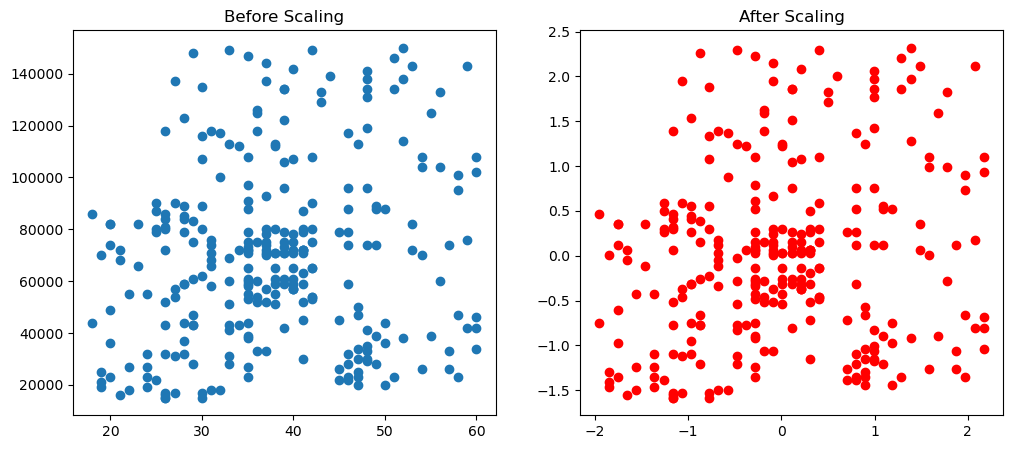

In [18]:
fig,(ax1,ax2) =plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(data=X_train,x='Age',y='EstimatedSalary')
ax1.set_title("Before Scaling")
ax2.scatter(data=X_train_scaled,x='Age',y='EstimatedSalary',color='red')
ax2.set_title("After Scaling")
plt.show()

C:\Users\raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

<Axes: xlabel='Age', ylabel='Density'>

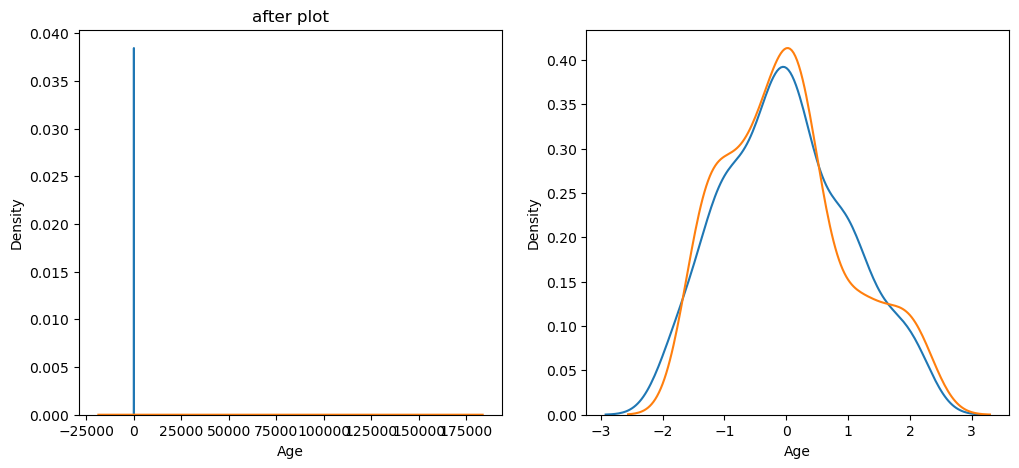

In [19]:
fig,( ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before plot")
sns.kdeplot(data=X_train,x='Age',ax=ax1)
sns.kdeplot(data=X_train,x='EstimatedSalary',ax=ax1)
ax1.set_title("after plot")
sns.kdeplot(data=X_train_scaled,x='Age',ax=ax2)
sns.kdeplot(data=X_train_scaled,x='EstimatedSalary',ax=ax2)

C:\Users\raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


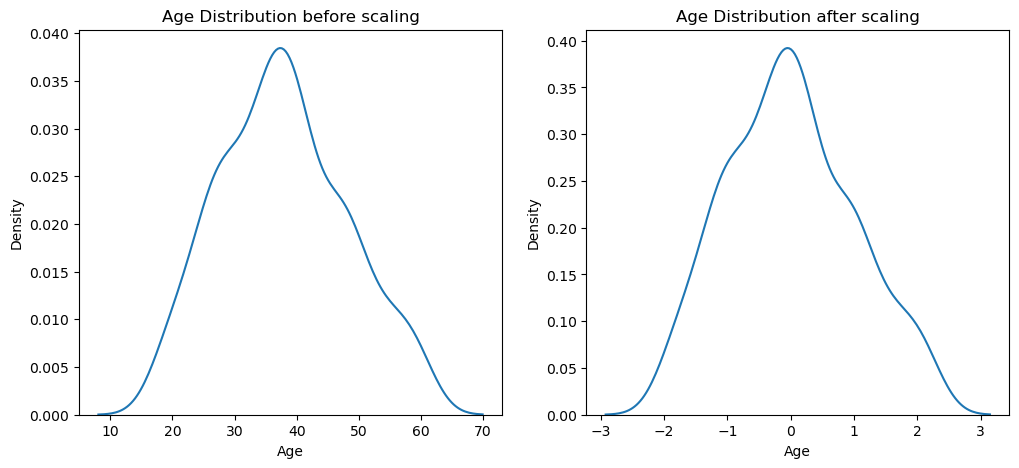

In [22]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#indually what is impact on age we can say that:
ax1.set_title("Age Distribution before scaling")
sns.kdeplot(data=X_train,x='Age',ax=ax1)

ax2.set_title("Age Distribution after scaling")
sns.kdeplot(data=X_train_scaled,x='Age',ax=ax2)
plt.show()


logist regrations

In [23]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [35]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [30]:
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

LogisticRegression()

In [34]:
from sklearn.metrics import accuracy_score

In [37]:
print("Actual",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [41]:
dt.fit(X_train,Y_train)
dt_scaled.fit(X_train_scaled,Y_train)

DecisionTreeClassifier()

In [42]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [44]:
print("Actual",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [45]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Effect of outlier

In [51]:
import pandas as pd

# New DataFrame to append
new_data = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})

# Using concat instead of append
df = pd.concat([df, new_data], ignore_index=True)

print(df)


     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
398   36            33000          0
399   49            36000          1
400    5             1000          0
401   90           250000          1
402   95           350000          1

[403 rows x 3 columns]


In [52]:
df.shape

(403, 3)

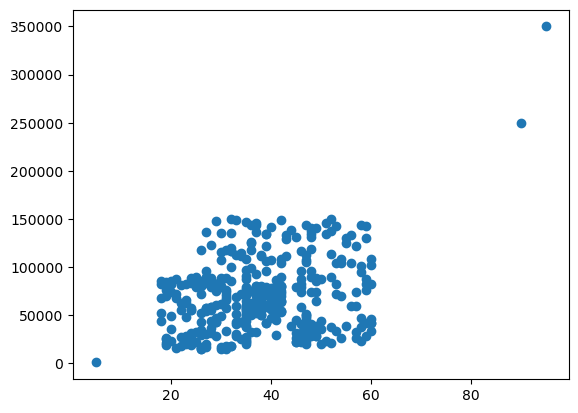

In [53]:
plt.scatter(data=df,x='Age',y='EstimatedSalary')

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape,X_test.shape

((282, 2),)

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


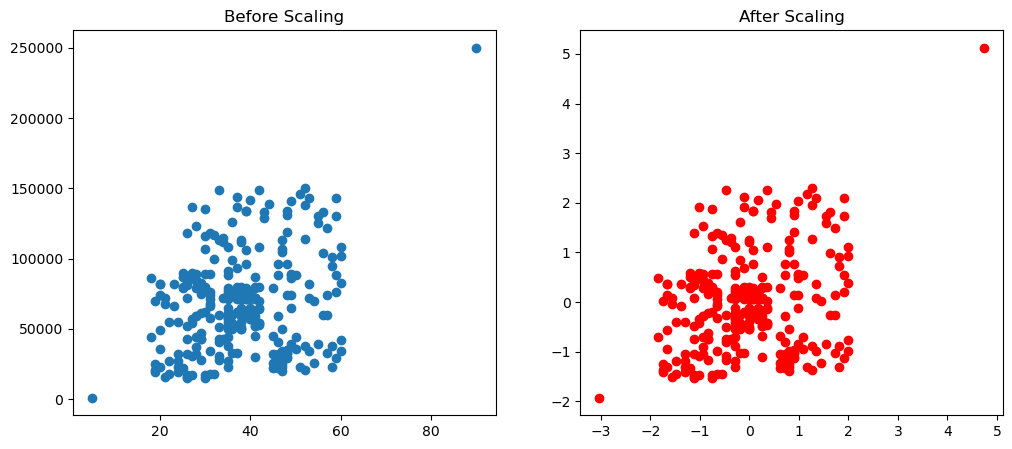

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Aug  1 09:21:00 2024

@author: raj
"""

import pandas as pd
import seaborn as sns
from feature_engine.outliers import Winsorizer
wine=Winsorizer(capping_method='iqr',
                tail='both',
                folt=1.5,
                variables=['Salaries'])
df=pd.read_csv("C:/Users/raj/2-data-sicence-30day/dataPreprationByOffline/ethnic diversity.csv.xls")
df_t=wine.fit_transform(df[['Salaries']])

sns.boxplot(df['Salaries'])
sns.boxplot(df_t['Salaries'])


ModuleNotFoundError: No module named 'feature_engine'